**Among all industries, the insurance domain has one of the largest uses of analytics & data science methods.In this notebook i am gonna predict the chances of loan getting approved**

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

sns.set_style({'xtick.bottom': False,
               'xtick.top': False,
               'ytick.left': False,
               'ytick.right': False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False,})

In [194]:
data = pd.read_csv('train_set.csv')

In [195]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [197]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [198]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**We have few missing values in following features**

| Column Name | Missing Values | d-type |
|-------------|----------------|--------|
**Gender**   |  **13**        | **Object** |
 **Married** |**3**|**Object**|
**Dependents**|**15**|**Object**|
 **Self_Employed**|**32**|**Object**
 **LoanAmount**|**22**|**float64**|
 **Loan_Amount_Term**|**14**|**float64**|
 **Credit_History**|**50**|**float64**|

**The average Applicant Income is 5403.4 dollars**

**The Average loan amount is 146.4 dollars**

**More than 84% people have credit history**

**lets fill missing values**

In [199]:
print(f'Mode of Gender is {data.Gender.mode()}')
print('=====================================')
print(f'Mode of Married is {data.Married.mode()}')
print('=====================================')
print(f'Mode of Dependents is {data.Dependents.mode()}')
print('=====================================')
print(f'Mode of Self Employed is {data.Self_Employed.mode()}')
print('=====================================')
print(f'Mode of Credit history is {data.Credit_History.mode()}')
print('=====================================')
print(f'Mode of Loan Amount Term is {data.Loan_Amount_Term.mode()}')
print('=====================================')
print(f'Mean of Loan Amount is {data.LoanAmount.mean()}')
print('=====================================')

Mode of Gender is 0    Male
dtype: object
Mode of Married is 0    Yes
dtype: object
Mode of Dependents is 0    0
dtype: object
Mode of Self Employed is 0    No
dtype: object
Mode of Credit history is 0    1.0
dtype: float64
Mode of Loan Amount Term is 0    360.0
dtype: float64
Mean of Loan Amount is 146.41216216216216


In [200]:
data['Gender'].fillna('Male',inplace=True)
data['Married'].fillna('Yes',inplace=True)
data['Dependents'].fillna('0',inplace=True)
data['Self_Employed'].fillna('No',inplace=True)
data['Credit_History'].fillna(1.0,inplace=True)
data['Loan_Amount_Term'].fillna(360,inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [201]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\WIN7\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


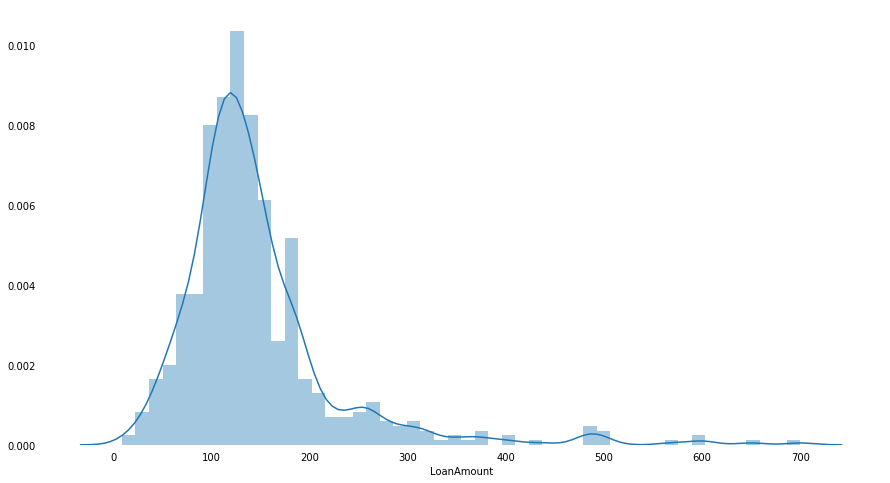

In [202]:
fig,ax1 = plt.subplots(figsize=(15,8))
sns.distplot(data['LoanAmount'],bins=50,ax=ax1)

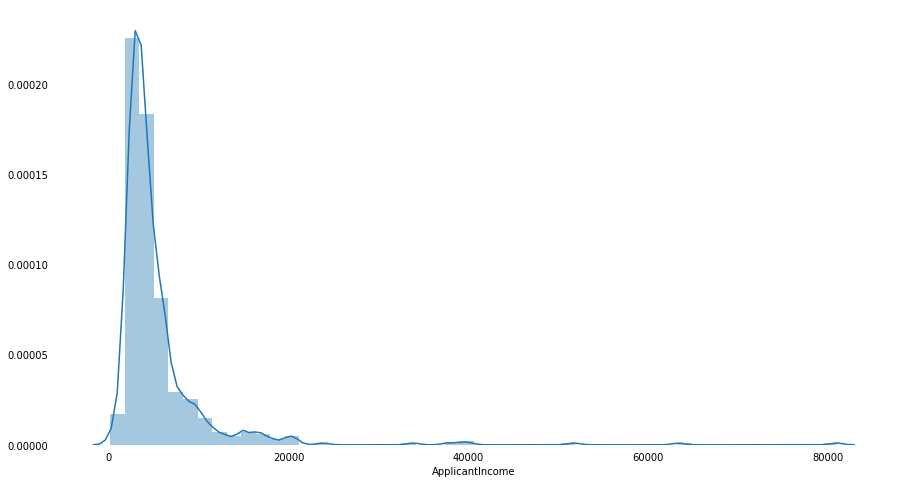

In [203]:
fig,ax1 = plt.subplots(figsize=(15,8))
sns.distplot(data['ApplicantIncome'],bins=50,ax=ax1)

## Outliers

**Lets see if there are any outliers in**
- **Applicant Income**
- **Loan Amount**

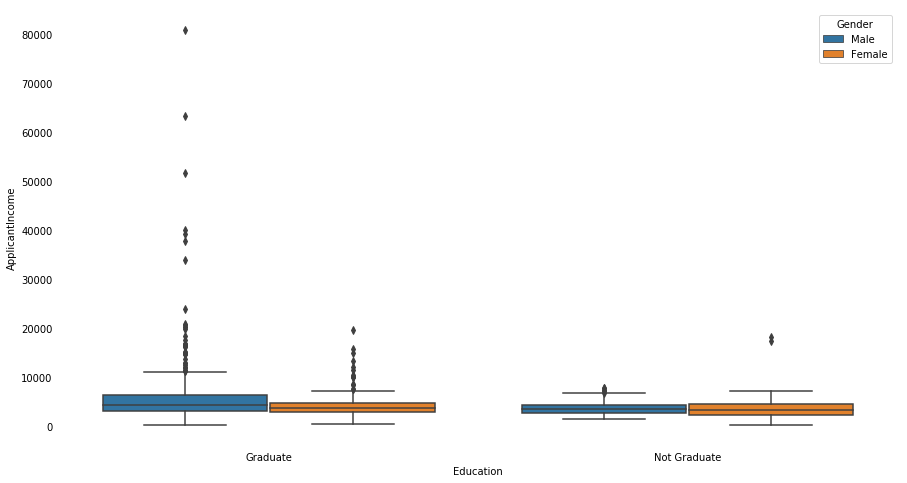

In [204]:
fig,ax1 = plt.subplots(figsize=(15,8))
sns.boxplot(x='Education',y='ApplicantIncome',data=data,ax=ax1,hue='Gender')

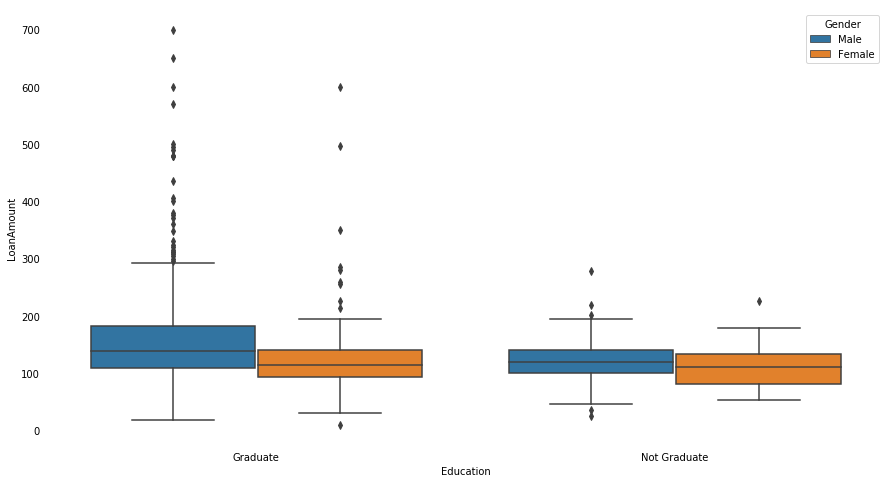

In [205]:
fig,ax1 = plt.subplots(figsize=(15,8))
sns.boxplot(x='Education',y='LoanAmount',data=data,ax=ax1,hue='Gender')

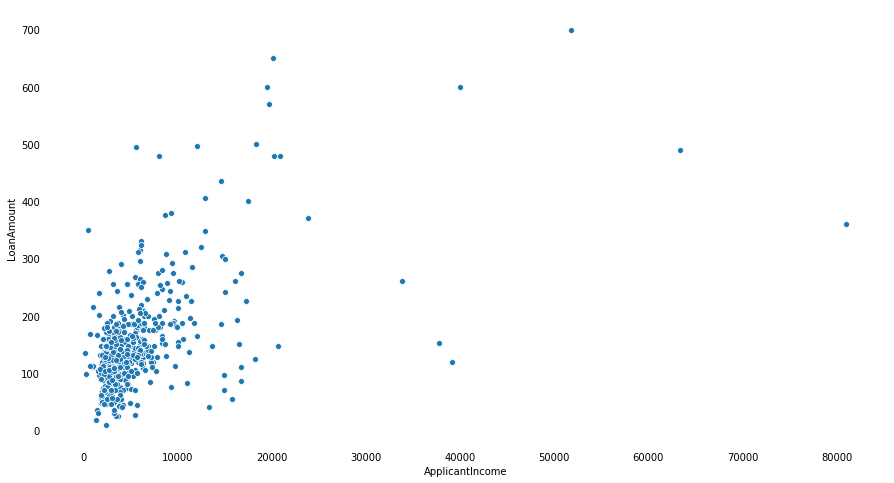

In [206]:
fig,ax1 = plt.subplots(figsize=(15,8))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=data,ax=ax1)

## Removing Outliers

In [207]:
data.drop(data.index[data.ApplicantIncome > 10000],axis=0,inplace=True)

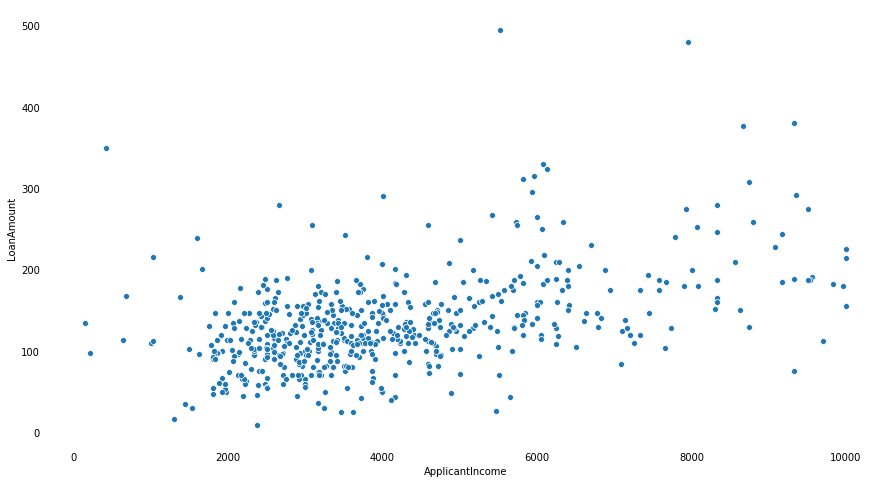

In [208]:
fig,ax1 = plt.subplots(figsize=(15,8))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=data,ax=ax1)

In [209]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Hypothesis Generation

**I came up with the following hypothesis while thinking about the problem**

- **Applicant Income** : Applicant With high income has high chances of loan getting approved than applicant with low income.since high income applicant has more chances of repaying loan
- **Education** : A Graduate Applicant has high chances of loan getting approved than UnGraduate applicant.because he has more chances of geetting a job or finding income source
- **Credit-Hisory** : Applicant with Credit history has high chances of loan getting approved than applicant with no credit history.Since there is already a record of his ability to repay loans
- **Area** : Applicant from Semi-Urban or Urban areas has high chances of loan getting approved than applicant from rural area.Because the applicants from those areas might already have high income.
- **Deppendents** : Applicants with 0 or 1 dependent has high chances of loan getting approved than applicant with more than 1 depedent.since more dependents = more expense

### Hypothesis.1

**Applicant With high income has high chances of loan getting approved than applicant with low income.since high income applicant has more chances of repaying loan**

In [210]:
# ApplicantIncome > Agerage income = high income , ApplicantIncome < Agerage income = low income
train_data = data.copy()
train_data['Income_category'] = train_data['ApplicantIncome'] > 4103
income = {True:'highIncome',False : 'lowIncome'}
train_data['Income_category'] = train_data['Income_category'].map(income)

In [211]:
train_data['Income_category'].value_counts()

lowIncome     340
highIncome    222
Name: Income_category, dtype: int64

In [212]:
train_data.loc[train_data.loc[:,'Loan_Status'] == 'Y','Income_category'].value_counts()

lowIncome     237
highIncome    150
Name: Income_category, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000214C97F0>],
      dtype=object)

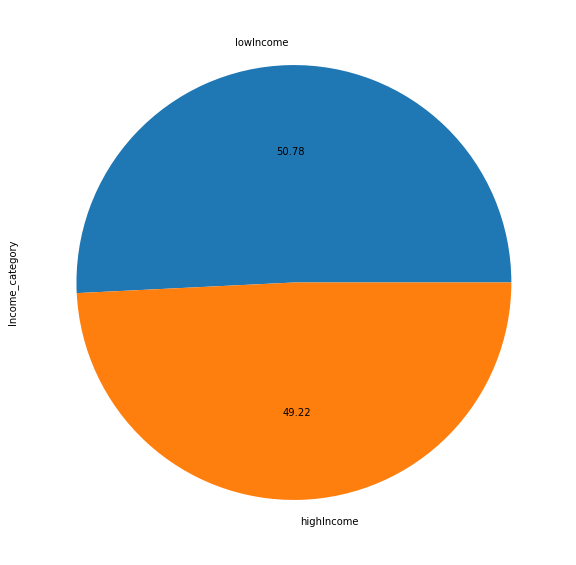

In [213]:
(train_data.loc[train_data.loc[:,'Loan_Status'] == 'Y','Income_category'].value_counts()*100/train_data['Income_category'].value_counts()).plot.pie(subplots=True,figsize=(10,10),autopct='%.2f')

**Even though the difference in minimal our hypothesis is wrong**

### Hypothesis.2

**A Graduate Applicant has high chances of loan getting approved than UnGraduate applicant.because he has more chances of geetting a job or finding income source**

In [214]:
train_data['Education'].value_counts()

Graduate        430
Not Graduate    132
Name: Education, dtype: int64

In [215]:
train_data.loc[train_data.loc[:,'Loan_Status'] == 'Y','Education'].value_counts()

Graduate        307
Not Graduate     80
Name: Education, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000210246A0>],
      dtype=object)

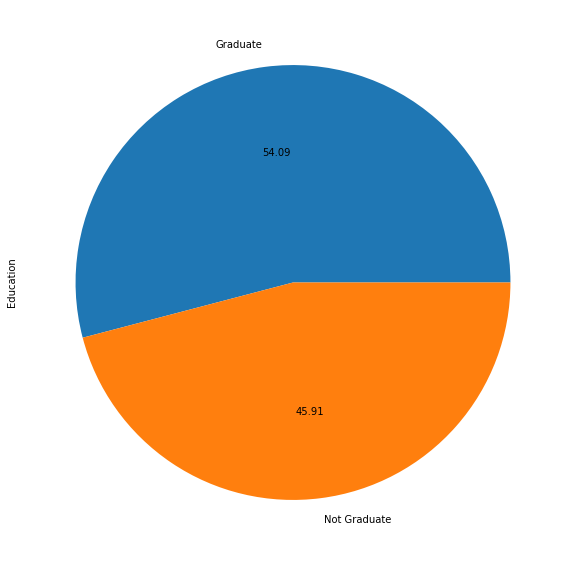

In [216]:
(train_data.loc[train_data.loc[:,'Loan_Status'] == 'Y','Education'].value_counts()*100/train_data['Education'].value_counts()).plot.pie(subplots=True,figsize=(10,10),autopct='%.2f')

**Looks like We got our 2nd hypothesis wrong**

### Hypothesis.3

**Applicant with Credit history has high chances of loan getting approved than applicant with no credit history.Since there is already a record of his ability to repay loans**

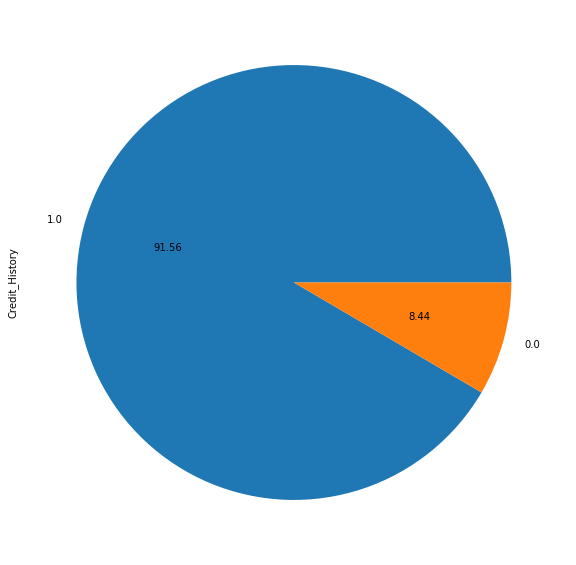

In [217]:
(train_data.loc[train_data.loc[:,'Loan_Status'] == 'Y','Credit_History'].value_counts()*100/train_data['Credit_History'].value_counts()).plot.pie(figsize=(10,10),autopct='%.2f')

**We got 3rd hypothesis right**

### Hypothesis.4

**Applicant from Semi-Urban or Urban areas has high chances of loan getting approved than applicant from rural area.Because the applicants from those areas might already have high income.**

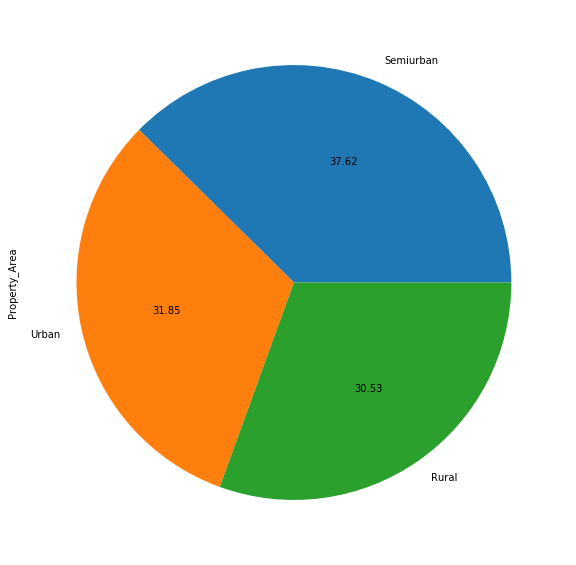

In [218]:
(train_data.loc[train_data.loc[:,'Loan_Status'] == 'Y','Property_Area'].value_counts()*100/train_data['Property_Area'].value_counts()).plot.pie(figsize=(10,10),autopct='%.2f')

**4th hypothesis is right too**

### Hypothesis.5

**Applicants with 0 or 1 dependent has high chances of loan getting approved than applicant with more than 1 depedent.since more dependents = more expense**

In [219]:
train_data['dep_cat'] = train_data['Dependents'].map({'0':'less_dep','1':'less_dep','2':'more_dep','3+':'more_dep'})

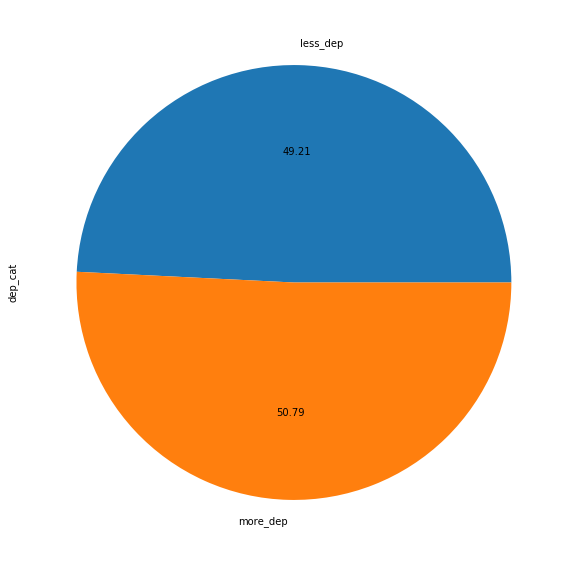

In [220]:
(train_data.loc[train_data.loc[:,'Loan_Status'] == 'Y','dep_cat'].value_counts()*100/train_data['dep_cat'].value_counts()).plot.pie(figsize=(10,10),autopct='%.2f')

**Our last hypothesis is wrong**

## Predictions

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              562 non-null object
Gender               562 non-null object
Married              562 non-null object
Dependents           562 non-null object
Education            562 non-null object
Self_Employed        562 non-null object
ApplicantIncome      562 non-null int64
CoapplicantIncome    562 non-null float64
LoanAmount           562 non-null float64
Loan_Amount_Term     562 non-null float64
Credit_History       562 non-null float64
Property_Area        562 non-null object
Loan_Status          562 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 61.5+ KB


In [222]:
lc = LabelEncoder()

data.Gender = lc.fit_transform(data.Gender)
data.Married = lc.fit_transform(data.Married)
data.Dependents = lc.fit_transform(data.Dependents)
data.Education = lc.fit_transform(data.Education)
data.Self_Employed = lc.fit_transform(data.Self_Employed)
data.Property_Area = lc.fit_transform(data.Property_Area)
data.Loan_Status = lc.fit_transform(data.Loan_Status)

dd = pd.get_dummies(data.Dependents,prefix='depedents',drop_first=True)
ds = pd.get_dummies(data.Self_Employed,prefix='self_employed',drop_first=True)
dp = pd.get_dummies(data.Property_Area,prefix='property_area',drop_first=True)

data = pd.concat([data,dd,ds,dp],axis=1)
data = data.drop(['Loan_ID','Dependents','Self_Employed','Property_Area'],axis=1)
data.head()

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,depedents_1,depedents_2,depedents_3,self_employed_1,property_area_1,property_area_2
0,1,0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,1
1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,0,0
2,1,1,0,3000,0.0,66.000000,360.0,1.0,1,0,0,0,1,0,1
3,1,1,1,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,0,1
4,1,0,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,1


In [223]:
X = data.drop(['Loan_Status'],axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [227]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

print(f'Accuracy : {accuracy_score(y_test,y_pred)}')
print(f'Roc_Auc_Score : {roc_auc_score(y_test,y_pred)}')
print(f'classification report : {classification_report(y_test,y_pred)}')
cm = confusion_matrix(y_test,y_pred)
cm

Accuracy : 0.7988165680473372
Roc_Auc_Score : 0.7054361567635904
classification report :               precision    recall  f1-score   support

           0       0.92      0.43      0.59        56
           1       0.78      0.98      0.87       113

   micro avg       0.80      0.80      0.80       169
   macro avg       0.85      0.71      0.73       169
weighted avg       0.82      0.80      0.77       169



C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 24,  32],
       [  2, 111]], dtype=int64)